<div align='center'>
    <a href="https://imgbb.com/"><img src="https://i.ibb.co/F4b8h50/images.jpg" alt="images" border="0"></a>
</div>

# Table Of Content
* 1. [Introduction](#2)
    * 1.1 [About Stock Market](#1.1)
    * 1.2 [About This Jupyter Notebook](#1.2)
* 2. [First Organization](#2)
    * 2.1 [Import Libraries](#2.1)
    * 2.2 [Import Dataset](#2.2)
    * 2.3 [Understanding Variables](#2.3)
    * 2.4 [Exploring Dataset](#2.4)
* 3. [Data Cleaning](#3)
    * 3.1 [Correcting Date Variable Data Type](#3.1)
    * 3.2 [Reset Index](#3.2)

* 4. [Feature Engineering](#4)
    * 4.1 [Adding Moving Average (MA50 & MA20)](#4.1)
    * 4.2 [Adding Daily Return](#4.2)
* 5. [Data Analysis](#5)
    * 5.1 [Distributions](#5.1)
    * 5.2 [Prices Over Time](#5.2)
    * 5.3 [Boxplots](#5.3)
    * 5.4 [Line Plot Of OHLC With MA50/MA20](#5.4)
    * 5.5 [Stock Price Deviation From MA](#5.5)
    * 5.6 [Candlestick Chart](#5.6)
    * 5.7 [Season Decomposition](#5.7)
    * 5.8 [Correlation Heatmap](#5.8)

# 1. Introduction <a id=1></a>

## 1.1 About Stock Market <a id=1.1></a>

1. **What is the Stock Market?**
   
   The stock market is like a big marketplace where people can buy and sell parts of companies. These parts are called "stocks" or "shares." When you buy a stock, you're essentially buying a tiny piece of ownership in a company.

2. **How Does it Work?**
   
   Imagine you have a lemonade stand, and it's doing really well. Now, you want to grow your business, but you need money to do that. So, instead of borrowing money from a bank, you decide to sell pieces of your lemonade stand to other people. Each piece you sell is a share of your business. Those people who buy shares become part-owners of your lemonade stand.

3. **Buying and Selling Stocks**
   
   In the stock market, there are buyers and sellers just like in any other marketplace. When you want to buy a stock, you find someone who is willing to sell it to you at a price you both agree on. Similarly, when you want to sell a stock you own, you find someone who is willing to buy it from you.

4. **Stock Exchanges**
   
   Stocks are traded on special platforms called stock exchanges. These are like giant marketplaces where people go to buy and sell stocks. Examples of stock exchanges include the New York Stock Exchange (NYSE) and the NASDAQ.

5. **Why Do Prices Change?**
   
   The price of a stock can go up or down based on a few things:
   - **Company Performance**: If a company is doing well and making lots of money, more people might want to buy its stock, so the price goes up.
   - **Market Sentiment**: Sometimes, the stock market goes up or down because of how people feel about the economy or certain industries. If people are feeling optimistic, stock prices may rise. If they're worried, prices might fall.
   - **Supply and Demand**: Just like with anything else, if lots of people want to buy a stock and there aren't many sellers, the price goes up. If there are more sellers than buyers, the price goes down.

6. **Investing and Risks**
   
   People invest in stocks to try to make money. They might buy stocks and hold onto them for a long time, hoping their value will increase. This is called "investing." However, it's important to know that investing in stocks comes with risks. Stock prices can be unpredictable, and they can go down as well as up. So, it's essential to do research and be prepared for the possibility of losing money.

7. **Regulation**
   
   The stock market is regulated by government agencies to make sure it's fair and safe for everyone. These agencies set rules and oversee things to prevent fraud and manipulation.

In a nutshell, the stock market is a place where people can buy and sell ownership in companies, with prices determined by factors like company performance, market sentiment, and supply and demand. It's a way for companies to raise money and for individuals to potentially grow their wealth, but it's important to understand the risks involved and to invest wisely.

## 1.2 About This Jupyter File <a id=1.2></a>

**Description**:

This Jupyter notebook is a versatile tool for conducting analysis on various aspects of the stock market using Python programming language and popular libraries such as Pandas, Matplotlib, and NumPy. The notebook allows users to input the name or ticker symbol of any publicly traded company and perform a range of analyses, including:

1. **Data Retrieval**:
   - The notebook fetches stock market data from reliable financial data sources such as Yahoo Finance or Alpha Vantage using APIs.

2. **Data Exploration**:
   - Provides a comprehensive overview of the retrieved data, including summary statistics, visualizations of historical price trends, and volume traded.

3. **Statistical Analysis**:
   - Conducts statistical tests and calculations to assess the risk and return profile of the stock, including measures such as standard deviation, beta, and Sharpe ratio.

4. **Correlation Analysis**:
   - Examines the correlation between the stock in question and other market indices or individual stocks to understand its relationship with broader market trends or specific sectors.

5. **Visualization**:
   - Generates informative visualizations, including time series plots, candlestick charts, scatter plots, and heatmaps, to present the analysis results in an intuitive and visually appealing manner.


**Usage**:
1. Input the desired stock symbol or company name.
2. Run the notebook to execute the predefined analysis tasks.
3. Customize analysis parameters, visualization styles, or additional functionalities as needed.
4. Interpret the analysis results to gain insights into the selected stock's performance, potential investment opportunities, and risk factors.


**Note**:
- Users are encouraged to review and validate the analysis results in conjunction with other sources of information and consult with financial professionals before making investment decisions.
- Regular updates and enhancements to the notebook may be provided to incorporate new features, address user feedback, and adapt to evolving market conditions.
- You can access to stocks information from this [Link](https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset)

# 2. First Organization <a id=2></a>

# 2.1 Import Libraries <a id=2.1></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import mplfinance as mpf

import warnings
warnings.filterwarnings('ignore')

## 2.2 Import Dataset <a id=2.1></a>

In [2]:
# Import Dataset
df = pd.read_csv("AAPL_2006-01-01_to_2018-01-01.csv")

## 2.3 Understanding Variables <a id=2.3></a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


1. **Date**: This column represents the date of the stock market data. It's of type `object`, which usually indicates that the dates are stored as strings.

2. **Open**: This column contains the opening price of the stock for each corresponding date. It's of type `float64`, which means it stores decimal numbers.

3. **High**: This column contains the highest price of the stock during the trading day for each corresponding date. It's also of type `float64`.

4. **Low**: This column contains the lowest price of the stock during the trading day for each corresponding date. Like the "High" column, it's also of type `float64`.

5. **Close**: This column contains the closing price of the stock for each corresponding date. It's also of type `float64`.

6. **Volume**: This column represents the trading volume of the stock for each corresponding date. It indicates how many shares were traded during the day. It's of type `int64`, which means it stores integer numbers.

7. **Name**: This column likely represents the name or ticker symbol of the stock. It's of type `object`, which usually indicates strings.

## 2.4 Exploring Dataset <a id=2.4></a>

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [5]:
df.size

21133

In [6]:
df.shape

(3019, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


## 2.5 Statistical Summary <a id=2.5></a>

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3019.0,6.467331e+01,4.452493e+01,7.39,2.342500e+01,5.786000e+01,9.916500e+01,1.751100e+02
High,3019.0,6.525683e+01,4.481177e+01,7.56,2.380500e+01,5.846000e+01,1.002750e+02,1.772000e+02
Low,3019.0,6.403344e+01,4.423083e+01,7.17,2.301500e+01,5.732000e+01,9.838500e+01,1.748600e+02
Close,3019.0,6.466289e+01,4.453645e+01,7.24,2.342000e+01,5.792000e+01,9.948000e+01,1.764200e+02
Volume,3019.0,1.311457e+08,1.018560e+08,11475922.00,5.292889e+07,1.066271e+08,1.798977e+08,8.432640e+08


### 2.5.1 Analysis Output <a id=2.5.1></a>

1. **Count**:
   - The count indicates the number of non-null values present in each column of the DataFrame. In this case, there are 3019 entries for each column, suggesting that there are no missing values in the dataset.

2. **Mean**:
   - The mean represents the average value of each column. For example, the average opening price (`Open`) of the stock over the given period is approximately $28.43, the average highest price (`High`) is around $28.77, the average lowest price (`Low`) is about $28.07, and the average closing price (`Close`) is approximately $28.41. The average trading volume (`Volume`) is approximately 21.58 million shares.

3. **Standard Deviation (Std)**:
   - The standard deviation measures the dispersion or spread of values around the mean. A higher standard deviation indicates greater variability in the data. In this case, the standard deviations for the stock prices (Open, High, Low, Close) and volume are all quite similar, indicating relatively consistent variability across these metrics.

4. **Minimum (Min)**:
   - The minimum value represents the lowest observed value in each column. For example, the lowest opening price (`Open`) during the period is $9.10, the lowest highest price (`High`) is $9.48, the lowest lowest price (`Low`) is $8.94, and the lowest closing price (`Close`) is $8.95. The minimum trading volume (`Volume`) is approximately 1.94 million shares.

5. **25th Percentile (25%)**:
   - This value indicates the value below which 25% of the data falls. It gives insight into the distribution of values in the lower range. For instance, the 25th percentile opening price (`Open`) is $16.18, and the 25th percentile closing price (`Close`) is $16.13.

6. **50th Percentile (50%) - Median**:
   - The median represents the middle value in the dataset when arranged in ascending order. Half of the data points lie below the median, and half lie above it. In this case, the median opening price (`Open`), highest price (`High`), lowest price (`Low`), and closing price (`Close`) are all around $27.18, $27.49, $26.82, and $27.10, respectively.

7. **75th Percentile (75%)**:
   - Similar to the 25th percentile, this value indicates the value below which 75% of the data falls. It provides insight into the distribution of values in the upper range. For example, the 75th percentile opening price (`Open`) is $36.65, and the 75th percentile closing price (`Close`) is $36.64.

8. **Maximum (Max)**:
   - The maximum value represents the highest observed value in each column. For instance, the highest opening price (`Open`) during the period is $73.02, the highest highest price (`High`) is $73.25, the highest lowest price (`Low`) is $72.46, and the highest closing price (`Close`) is $72.93. The maximum trading volume (`Volume`) is approximately 438.23 million shares.

# 3. Data Cleaning <a id=3></a>

## 3.1 Correcting Date Variable Datatype <a id=3.1></a>

In [9]:
# Convert Date to datetime dtype
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
# Drop "Name" Column as it is not useful in our analysis
df.drop(columns=['Name'], inplace=True)

In [11]:
# Set date as index
df.head(1)

,Date,Open,High,Low,Close,Volume
0,2006-01-03,10.34,10.68,10.32,10.68,201853036


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3019 non-null   datetime64[ns]
 1   Open    3019 non-null   float64       
 2   High    3019 non-null   float64       
 3   Low     3019 non-null   float64       
 4   Close   3019 non-null   float64       
 5   Volume  3019 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 141.6 KB


## 3.2 Reset Index <a id=3.2></a>

_Set "Date" variable as index of dataframe_

In [13]:
df.set_index("Date", inplace=True)

In [14]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036
2006-01-04,10.73,10.85,10.64,10.71,155225609
2006-01-05,10.69,10.70,10.54,10.63,112396081
2006-01-06,10.75,10.96,10.65,10.90,176139334
2006-01-09,10.96,11.03,10.82,10.86,168861224


# 4. Feature Engineering <a id=4>

## 4.1 Adding Moving Average (MA50 & MA20) <a id=4.1></a>

In [15]:
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_100'] = df['Close'].rolling(window=100).mean()
df.head(55) # To Check value of "MA_50"

,Open,High,Low,Close,Volume,MA_50,MA_100
Date,,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,NaN,NaN
2006-01-04,10.73,10.85,10.64,10.71,155225609,NaN,NaN
2006-01-05,10.69,10.70,10.54,10.63,112396081,NaN,NaN
2006-01-06,10.75,10.96,10.65,10.90,176139334,NaN,NaN
2006-01-09,10.96,11.03,10.82,10.86,168861224,NaN,NaN
2006-01-10,10.89,11.70,10.83,11.55,570088246,NaN,NaN
2006-01-11,11.98,12.11,11.80,11.99,373548882,NaN,NaN
2006-01-12,12.14,12.34,11.95,12.04,320201966,NaN,NaN
2006-01-13,12.14,12.29,12.09,12.23,194153393,NaN,NaN


## 4.2 Adding Daily Return <a id=4.2></a>

In [16]:
df['Daily_Return'] = df['Close'].pct_change()
df.head(2)

,Open,High,Low,Close,Volume,MA_50,MA_100,Daily_Return
Date,,,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,NaN,NaN,NaN
2006-01-04,10.73,10.85,10.64,10.71,155225609,NaN,NaN,0.002809


# 5. Data Analysis <a id=4></a>

## 5.1 Distributions <a id=5.1></a>

In [17]:
# Check distribution
def dist(df, col):
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=365, palette='Set3', kde=True, edgecolor='black')
    plt.title(f"Distribution of {col} Prices", fontsize=12)
    plt.xlabel("Closing Price", fontsize=12)
    plt.ylabel("Frequency")
    plt.show()

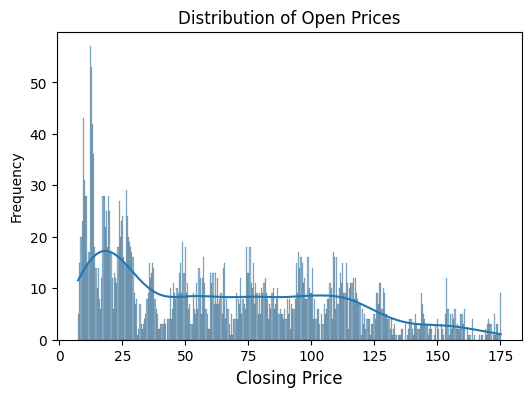

In [18]:
dist(df, 'Open')

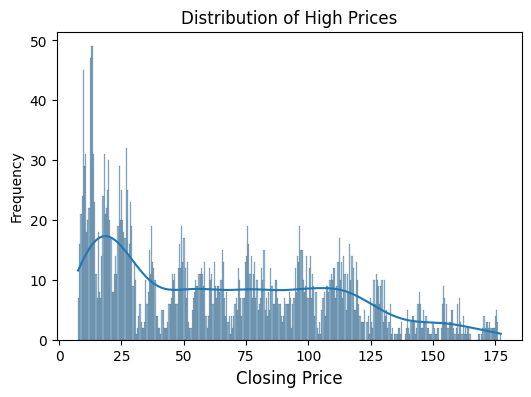

In [19]:
dist(df, 'High')

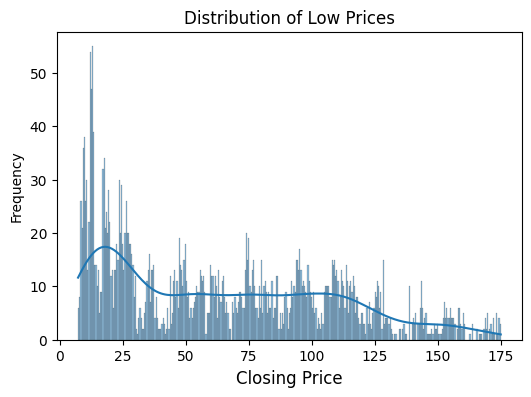

In [20]:
dist(df, 'Low')

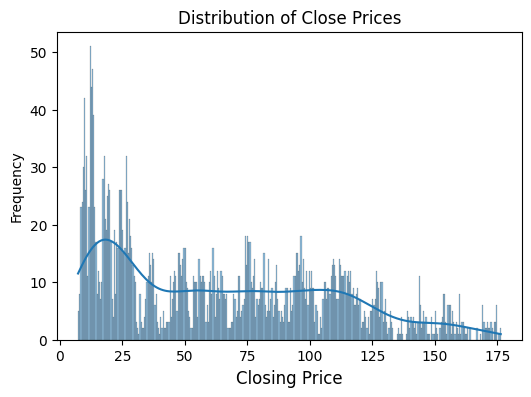

In [21]:
dist(df, 'Close')

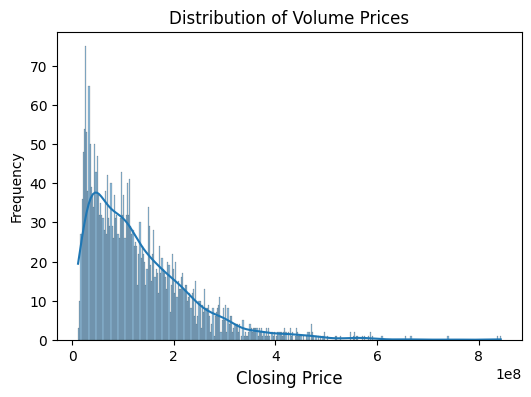

In [22]:
dist(df, 'Volume')

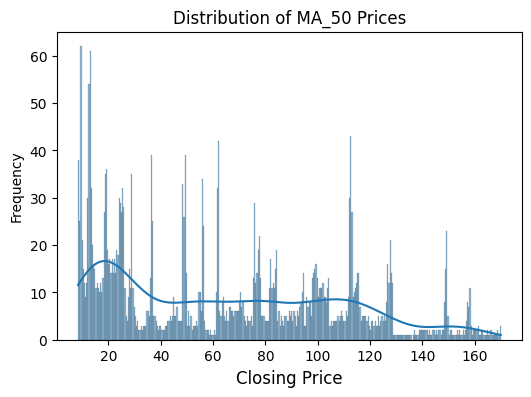

In [23]:
dist(df, 'MA_50')

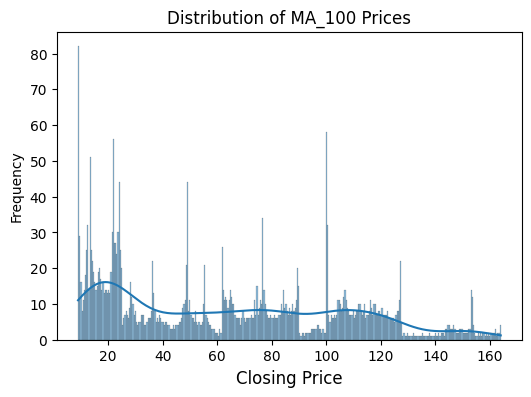

In [24]:
dist(df, 'MA_100')

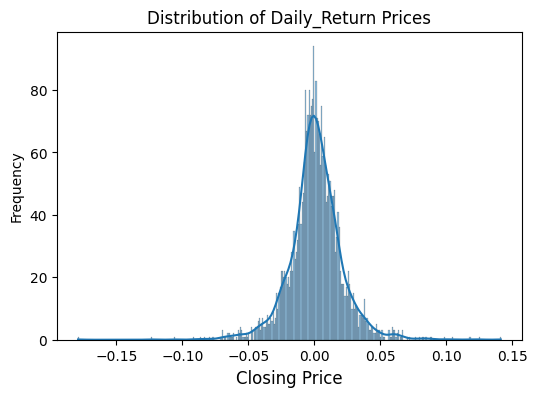

In [25]:
dist(df, 'Daily_Return')

## 5.2 Prices Over The Time <a id=5.2></a>

In [26]:
def price_over_time(df, col):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df[col])
    plt.title(f"{col} Price/Volume Over The Time")
    plt.xlabel("Date")
    plt.ylabel(f"{col} Price")
    plt.show()

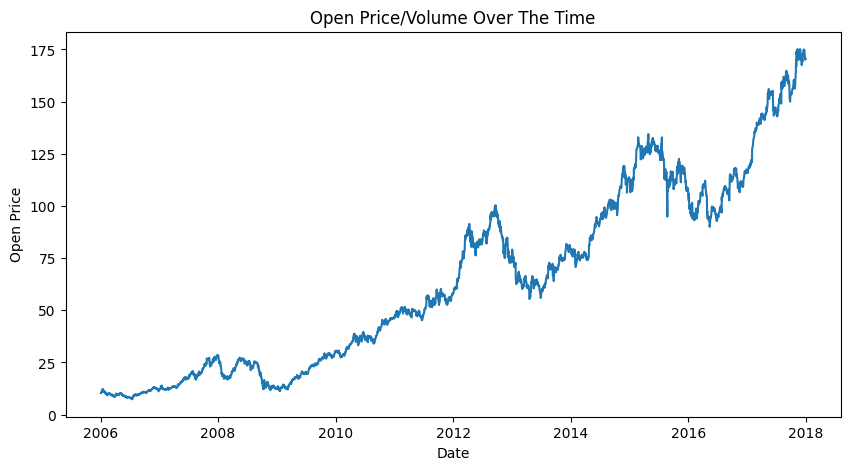

In [27]:
price_over_time(df, 'Open')

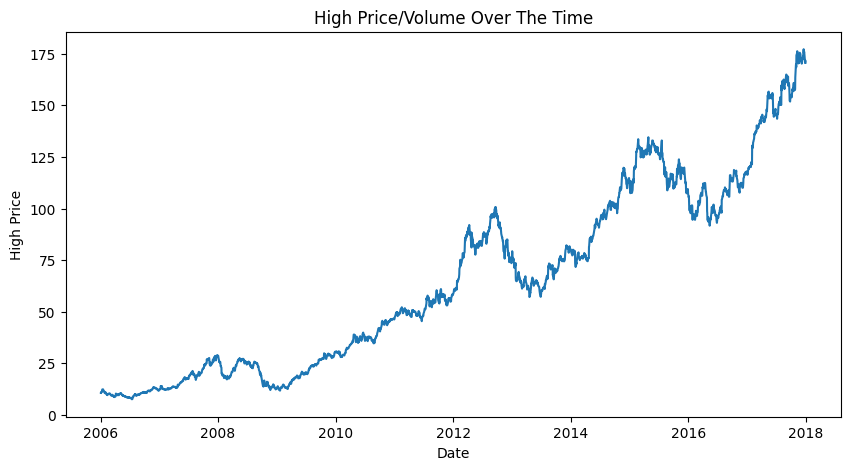

In [28]:
price_over_time(df, 'High')

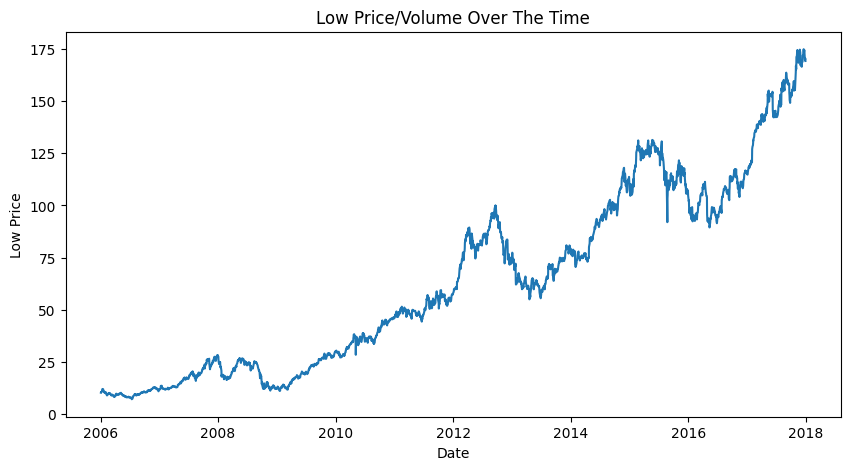

In [29]:
price_over_time(df, 'Low')

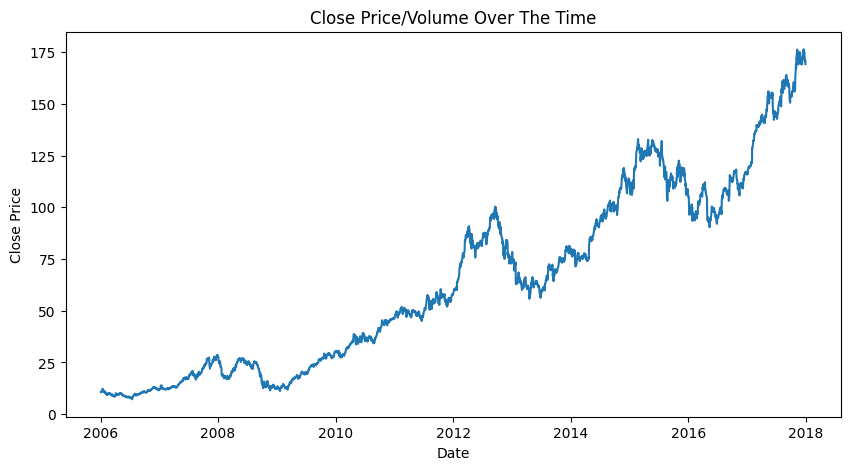

In [30]:
price_over_time(df, 'Close')

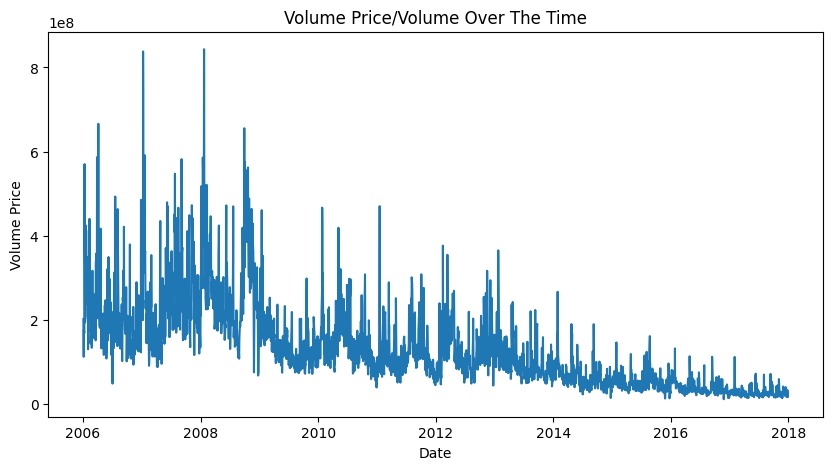

In [31]:
price_over_time(df, 'Volume')

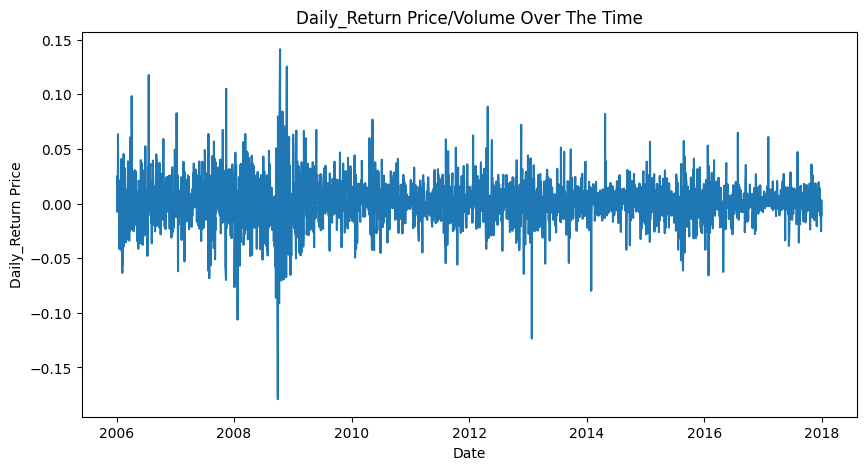

In [32]:
price_over_time(df, 'Daily_Return')

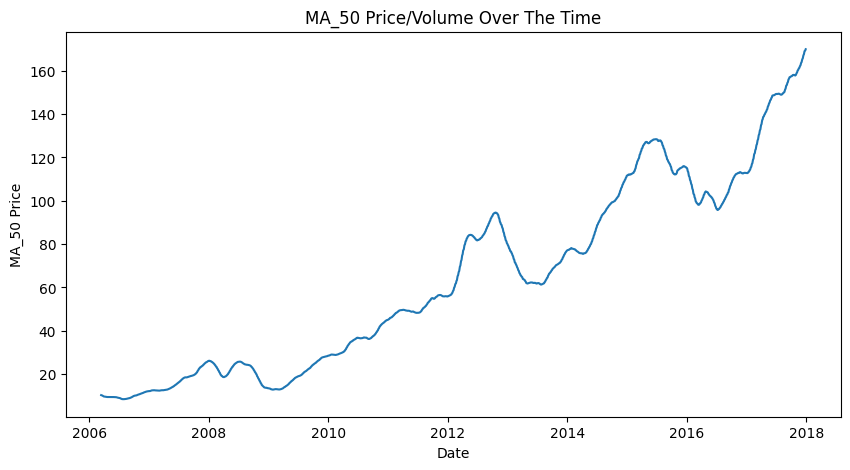

In [33]:
price_over_time(df, 'MA_50')

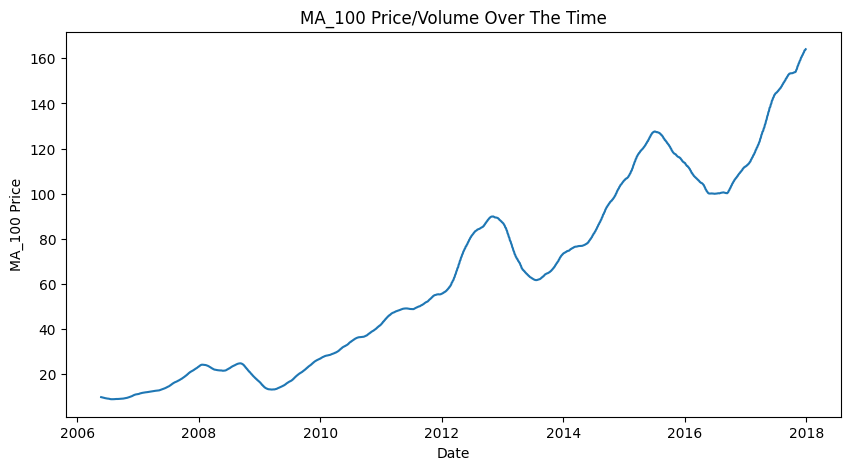

In [34]:
price_over_time(df, 'MA_100')

## 5.3 Boxplots <a id=5.3></a>

In [35]:
def boxplot(df, col):
    plt.figure(figsize=(4, 6))
    sns.boxplot(data=df, y=col, color='Green', width=0.4)
    plt.title(f"{col} Boxplot")
    plt.show()

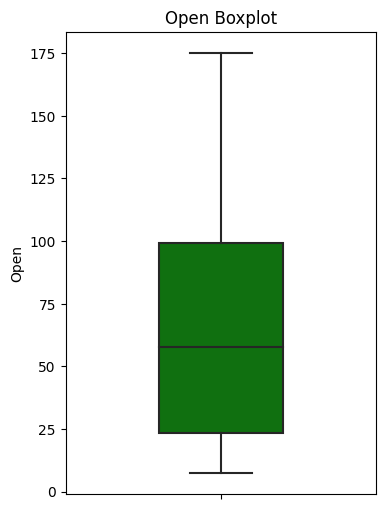

In [36]:
boxplot(df, 'Open')

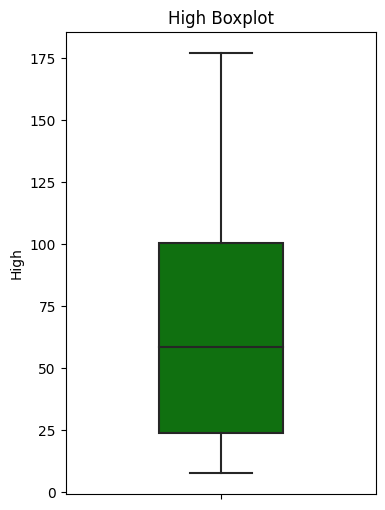

In [37]:
boxplot(df, 'High')

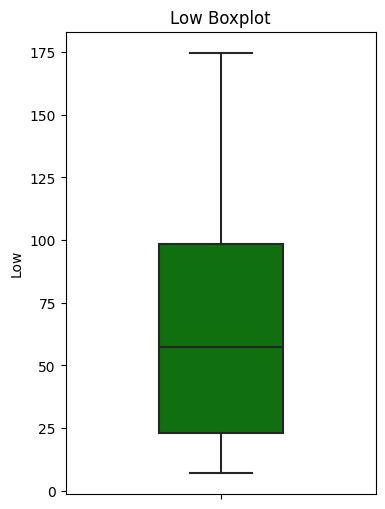

In [38]:
boxplot(df, 'Low')

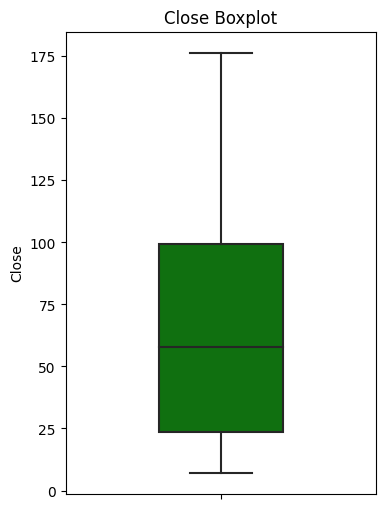

In [39]:
boxplot(df, 'Close')

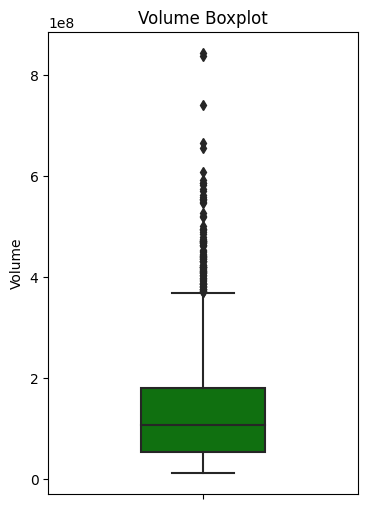

In [40]:
boxplot(df, 'Volume')

## 5.4 Line Plot Of OHLC With MA50/MA20 <a id=5.4></a>

In [41]:
import matplotlib.pyplot as plt

def plot_moving_averages(df, col):
    """
    Plot the stock price along with its 50-day and 100-day moving averages.

    Parameters:
        df (DataFrame): The DataFrame containing stock data.
        col (str): The column name representing the stock price.

    Returns:
        None
    """
    plt.figure(figsize=(12, 8))

    # Plot stock price
    plt.plot(df.index, df[col], label=f"{col} Price", color='blue')

    # Plot 50-day moving average
    plt.plot(df.index, df['MA_50'], label="50-Day Moving Average", color='orange')

    # Plot 100-day moving average
    plt.plot(df.index, df['MA_100'], label="100-Day Moving Average", color='green')

    # Set plot title and labels
    plt.title(f"Stock Price and Moving Averages for {col}", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Price", fontsize=14)

    # Add legend
    plt.legend(fontsize=12)

    # Show plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [42]:
ma_50_100(df, 'Open')

NameError: name 'ma_50_100' is not defined

In [ ]:
ma_50_100(df, 'High')

In [ ]:
ma_50_100(df, 'Low')

In [ ]:
ma_50_100(df, 'Close')

## 5.5 Stock Price Deviation From MA <a id=5.5></a>

In [ ]:
def plot_price_deviation(df):
    """
    Plot the deviation of the stock price from its moving averages.

    Parameters:
        df (DataFrame): The DataFrame containing stock data.

    Returns:
        None
    """
    plt.figure(figsize=(12, 6))

    # Calculate price deviation from moving averages
    deviation = df['Close'] - df['MA_50']

    # Plot deviation
    plt.plot(df.index, deviation, label="Price Deviation", color='purple')

    # Set plot title and labels
    plt.title("Price Deviation from 50-Day Moving Average", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Price Deviation", fontsize=14)

    # Add horizontal line at 0 for reference
    plt.axhline(0, color='black', linestyle='--', linewidth=0.5)

    # Add legend
    plt.legend(fontsize=12)

    # Show plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
plot_price_deviation(df)

## 5.6 Candlestick Chart <a id=5.6></a>

In [ ]:
def plot_candlestick(df, title=None, ylabel=None, ylabel_lower=None, figsize=(12, 8)):
    """
    Plot stock prices using candlestick charts with Moving Averages (MA50 and MA100).

    Parameters:
        df (DataFrame): The DataFrame containing stock data.
        title (str): Title of the plot (optional).
        ylabel (str): Label for the y-axis (optional).
        ylabel_lower (str): Label for the lower y-axis (optional).
        figsize (tuple): Size of the figure (width, height) in inches (optional).

    Returns:
        None
    """
    # Convert DataFrame index to datetime if not already
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)
    
    # Define style parameters for the candlestick chart
    mc = mpf.make_marketcolors(up='green', down='red', inherit=True)
    s = mpf.make_mpf_style(marketcolors=mc, gridstyle=':', gridcolor='#f0f0f0', y_on_right=False)
    
    # Plot candlestick chart with Moving Averages
    mpf.plot(df, type='candle', style=s, volume=True, title=title, ylabel=ylabel, ylabel_lower=ylabel_lower, figsize=figsize,
             mav=(50, 100))  # Plot MA50 and MA100

In [ ]:
# Assuming df is your DataFrame containing stock data
plot_candlestick(df, title='Stock Price Candlestick Chart', ylabel='Price', ylabel_lower='Volume', figsize=(18, 10))

## 5.7 Season Decomposition <a id=5.7></a>

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='multiplicative', period=30)
result.plot()
plt.show()

## 5.8 Correlation Heatmap

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), cmap='Spectral', annot=True, fmt='.2f')